# Notebook Challenge 3: naar multiagent systemen

## 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
from loan.batchrunner import run_batch
import loan.helpers as helpl 

df = run_batch()

14000it [01:56, 120.06it/s]


In [3]:
df.head()

,factory_location,helper_type,N,Run,End time,Hitpoints,Ill vertices,Vertices healed
0,1,1,helperagent,0,49,-2,"[11, 10, 9, 5]",5
8403,9,4,helperagent,0,88,-2,"[1, 5, 13, 9]",13
8295,9,2,greedyhelperagent,0,66,-2,"[2, 4, 11, 6]",4
8204,9,2,helperagent,0,81,-1,"[4, 13, 1, 5]",8
8103,9,1,greedyhelperagent,0,71,-1,"[6, 8, 13, 10]",6


In [4]:
df.groupby(["helper_type", "factory_location"]).mean().sort_values(["End time"], ascending=False)

Run  End time  Hitpoints  Vertices healed
helper_type factory_location                                            
10          8                 49.5    86.205     12.185           11.740
8           8                 49.5    85.370      9.635           11.320
10          6                 49.5    85.105      8.770           11.825
8           6                 49.5    84.215      8.760           11.145
10          3                 49.5    83.925      6.370           11.115
...                            ...       ...        ...              ...
1           11                49.5    63.500     -1.120            5.730
            3                 49.5    63.340     -1.100            5.960
            12                49.5    62.460     -1.220            5.270
            14                49.5    61.935     -1.015            5.275
            1                 49.5    59.350     -1.155            4.305

[70 rows x 4 columns]

## Plotten van de resultaten
Allereerst wordt de representatie van het lichaam getoond.

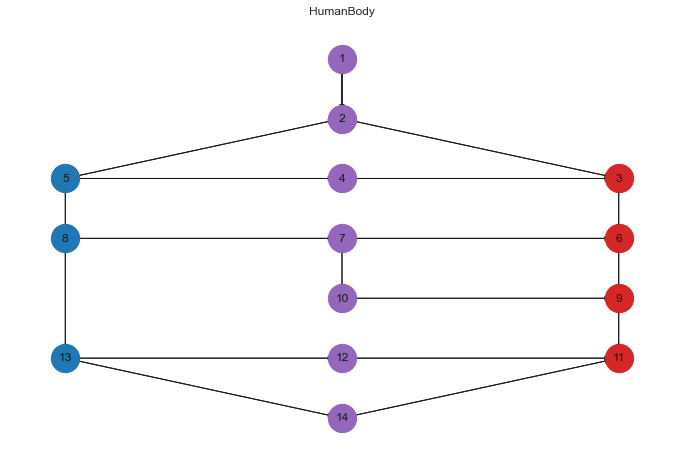

In [5]:
graph = helpl.graph_from_json(r"./loan/data/network.json")
plt.figure(figsize=(12,8))
helpl.plot_graph(graph)

### plotting the results of the experiment

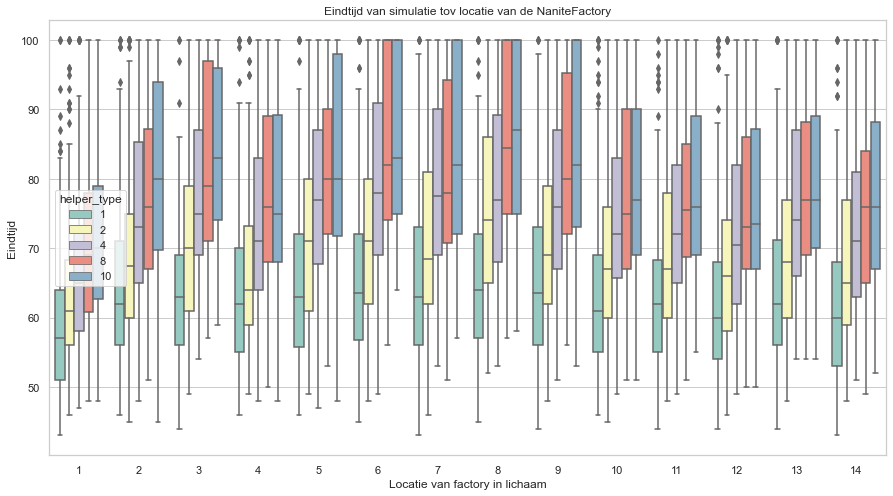

In [6]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="factory_location", y="End time", hue="helper_type",
                 data=df, palette="Set3")
ax.set_title("Eindtijd van simulatie tov locatie van de NaniteFactory")
ax.set_xlabel("Locatie van factory in lichaam")
ax.set_ylabel("Eindtijd")
plt.show()